In [1]:
from src.Generator import Generator
from src.Discriminator import Discriminator
from src.utils.tools import * 
from src.data.GenLoaders import *
from src.data.format_converter import data_converter
from src.training.trainer import *
import torch
from collections import Counter
torch.manual_seed(0); # Set for testing purposes, please do not change!

In [2]:
#convert data for binary classification filtering out bogus and asteroid
save_dir = 'data/'
data_converter(save_dir='data/', file_name="stamp_dataset_28.pkl" , label_as_strings=False, binarize_labels=True)

In [3]:
#load synthetic data
with open("generated_dataset_50000_modelwgangp28.pkl", 'rb') as f:
    data = pk.load(f)

synthetic_SN=torch.Tensor(data['images'])

/tmp/ipykernel_229978/2930878963.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343970094/work/torch/csrc/utils/tensor_new.cpp:245.)
  synthetic_SN=torch.Tensor(data['images'])


dict_keys(['Train', 'Validation', 'Test'])
tensor([29065,  1396])
tensor([200, 100])
tensor([200, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


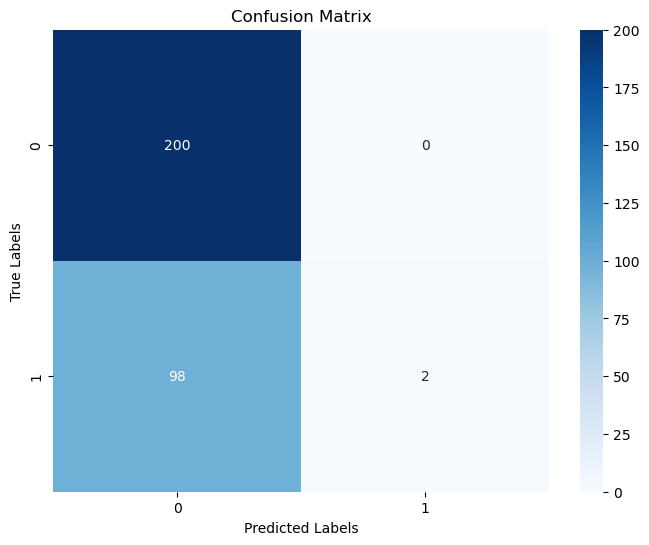

Val loss: 1.204445332288742, Val acc: 0.6733333333333333
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


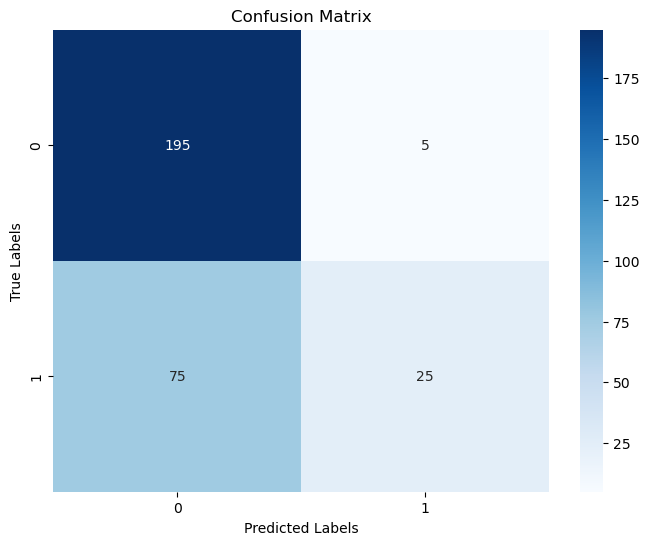

Val loss: 1.155001413822174, Val acc: 0.7333333333333333
Epoch 3/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2174480259418488, Val acc: 0.6666666666666666
Epoch 4/300
Val loss: 1.2173921585083007, Val acc: 0.6666666666666666
Epoch 5/300
Val loss: 1.2173689484596253, Val acc: 0.6666666666666666
Epoch 6/300
Val loss: 1.2173528671264648, Val acc: 0.6666666666666666
Epoch 7/300
Val loss: 1.2173431992530823, Val acc: 0.6666666666666666
Epoch 8/300
Val loss: 1.2173389196395874, Val acc: 0.6666666666666666
Epoch 9/300
Val loss: 1.2173364400863647, Val acc: 0.6666666666666666
Epoch 10/300
Val loss: 1.2173348903656005, Val acc: 0.6666666666666666
Epoch 11/300
Val loss: 1.2173339784145356, Val acc: 0.6666666666666666
Epoch 12/300
Val loss: 1.2173332870006561, Val acc: 0.6666666666666666
Epoch 13/300
Val loss: 1.217332673072815, Val acc: 0.6666666666666666
Epoch 14/300
Val loss: 1.21733255982399, Val acc: 0.6666666666666666
Epoch 15/300
Val loss: 1.2173324644565582, Val acc: 0.6666666666666666
Epoch 16/300
Val loss: 1.2173324704170227, Val acc: 0.6666666666666666
Epoch 17/300
Val loss: 1.217

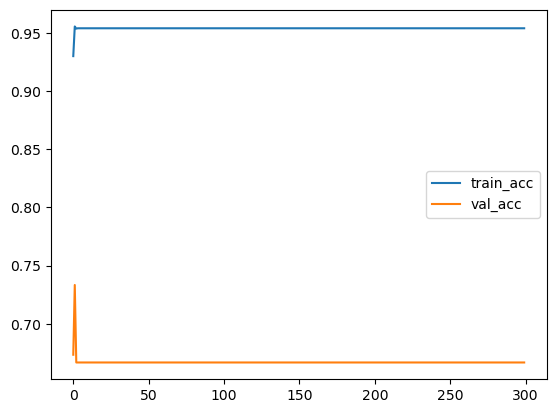

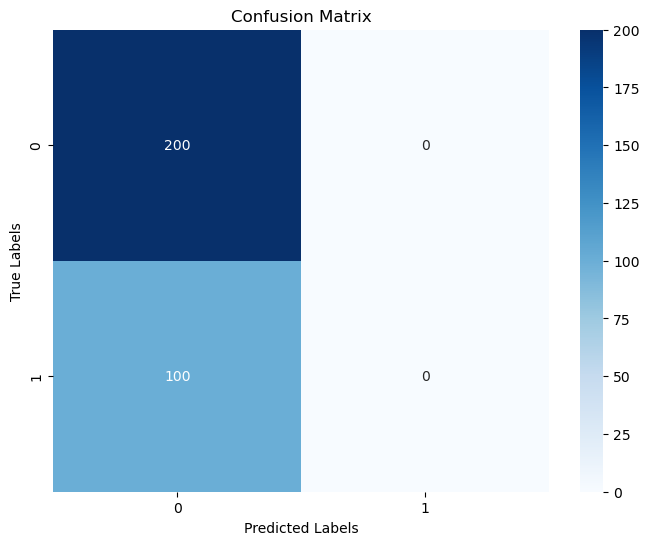

Test loss: 1.2173325955867766, Test acc: 0.6666666666666666


In [4]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",synthetic_SN=synthetic_SN,syn_in_train=0,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([29065,  6396])
tensor([200, 100])
tensor([200, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


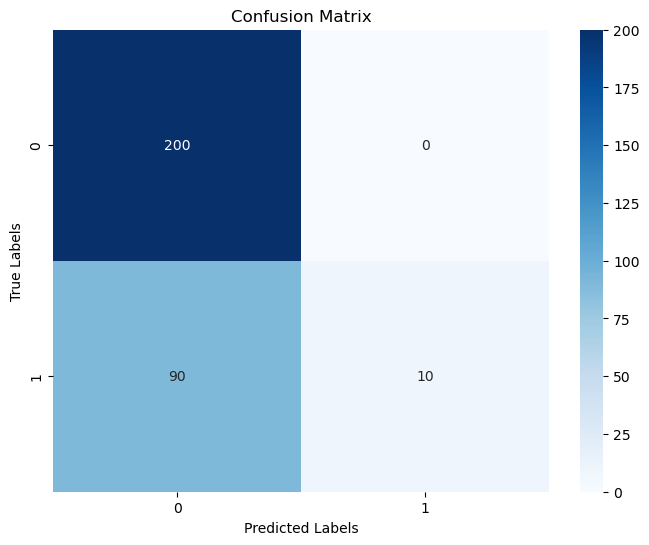

Val loss: 1.1841849625110625, Val acc: 0.7
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


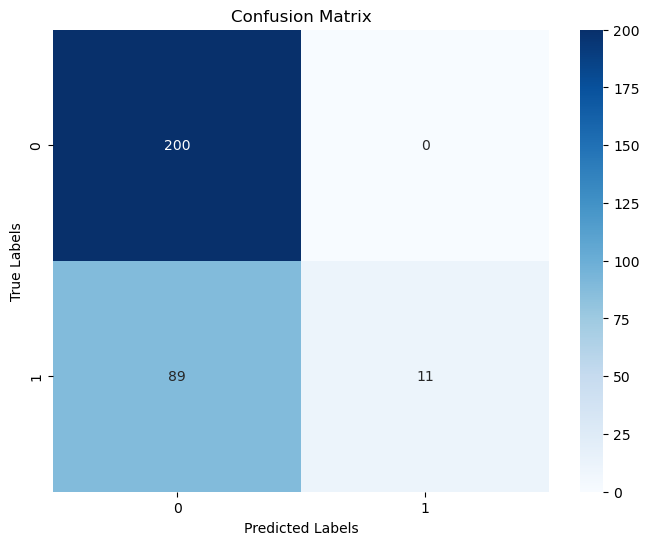

Val loss: 1.1809427261352539, Val acc: 0.7033333333333334
Epoch 3/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


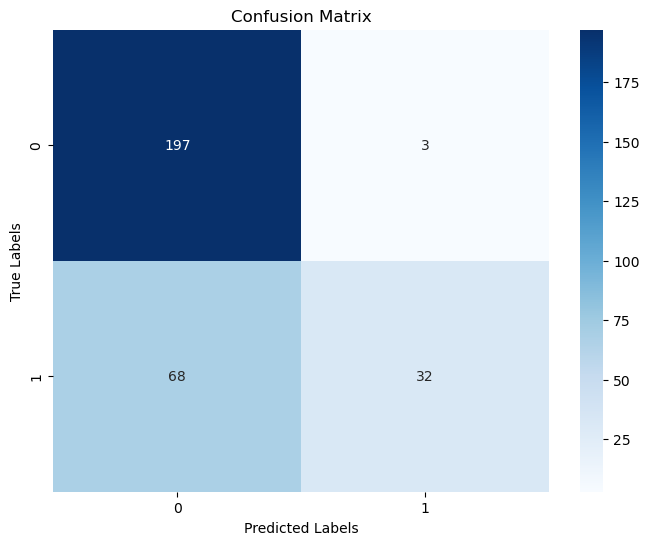

Val loss: 1.125633293390274, Val acc: 0.7633333333333333
Epoch 4/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


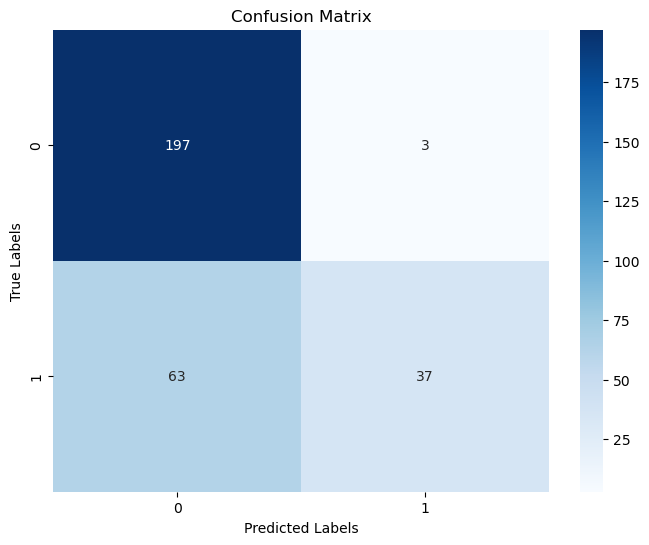

Val loss: 1.1115527331829071, Val acc: 0.78
Epoch 5/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1228433072566986, Val acc: 0.7666666666666667
Epoch 6/300
Val loss: 1.1411343693733216, Val acc: 0.7466666666666667
Epoch 7/300
Val loss: 1.176384150981903, Val acc: 0.71
Epoch 8/300
Val loss: 1.1508919835090636, Val acc: 0.7366666666666667
Epoch 9/300
Val loss: 1.1306905448436737, Val acc: 0.76
Epoch 10/300


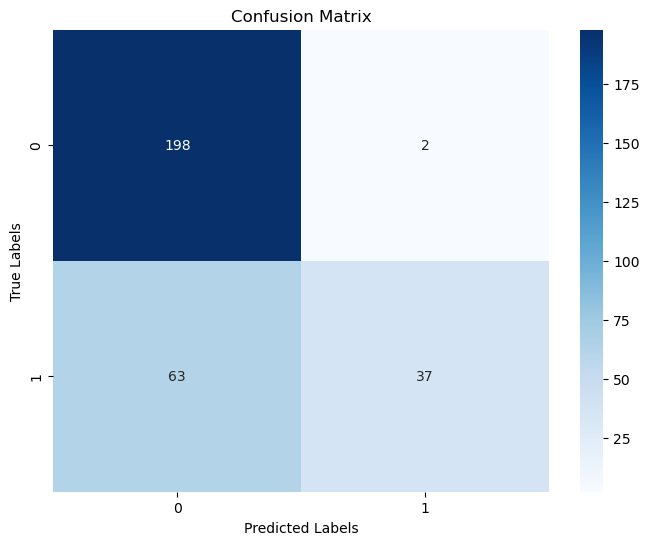

Val loss: 1.1065489828586579, Val acc: 0.7833333333333333
Epoch 11/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1147864580154419, Val acc: 0.7733333333333333
Epoch 12/300


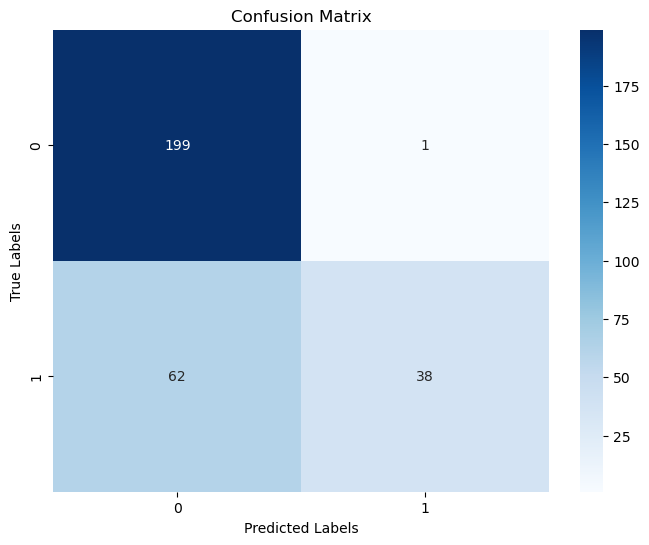

Val loss: 1.1042123973369598, Val acc: 0.79
Epoch 13/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.135192197561264, Val acc: 0.7533333333333333
Epoch 14/300
Val loss: 1.139532196521759, Val acc: 0.75
Epoch 15/300
Val loss: 1.1147908627986909, Val acc: 0.7766666666666666
Epoch 16/300


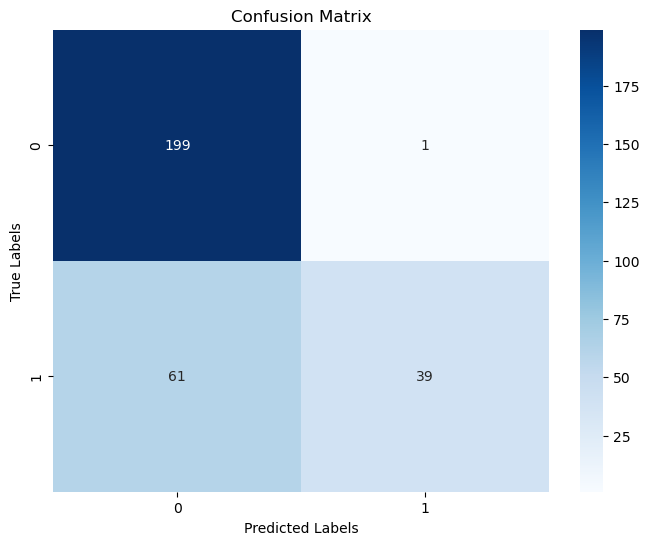

Val loss: 1.0961436092853547, Val acc: 0.7933333333333333
Epoch 17/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1129566371440887, Val acc: 0.7766666666666666
Epoch 18/300


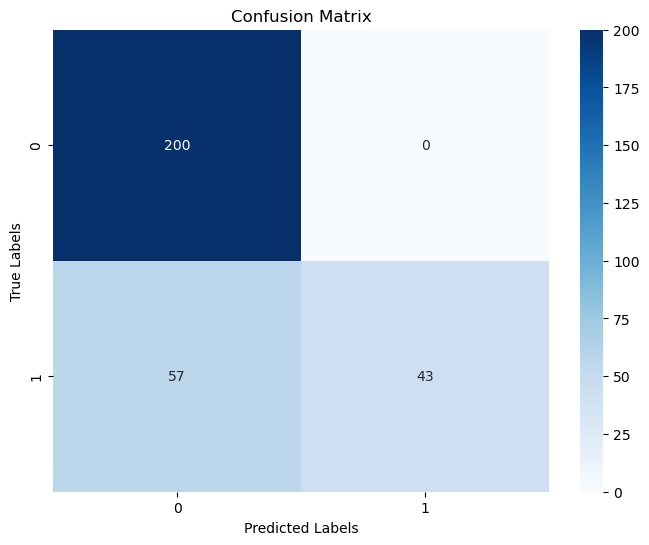

Val loss: 1.0850407302379608, Val acc: 0.81
Epoch 19/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


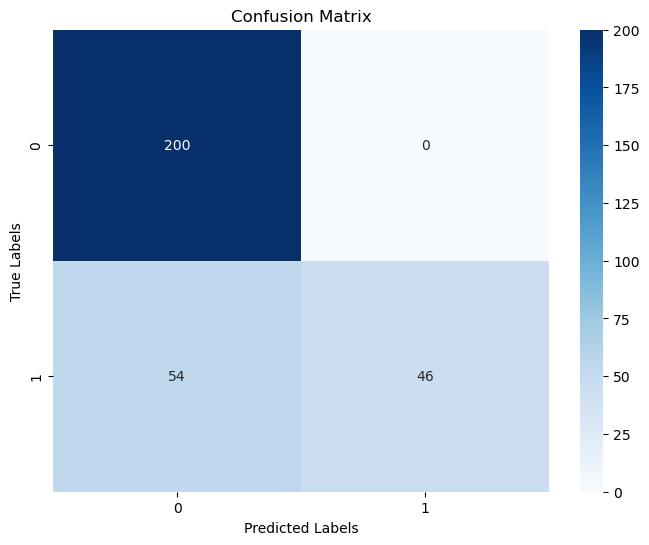

Val loss: 1.0728132247924804, Val acc: 0.82
Epoch 20/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1001127362251282, Val acc: 0.7933333333333333
Epoch 21/300
Val loss: 1.0871338725090027, Val acc: 0.8066666666666666
Epoch 22/300


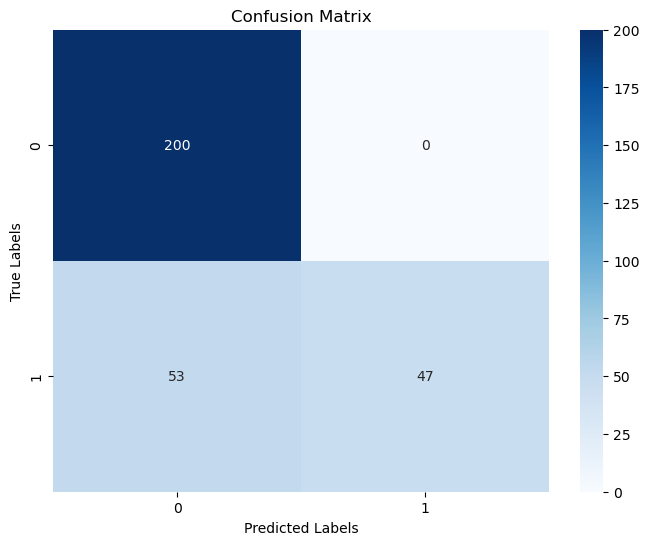

Val loss: 1.071595883369446, Val acc: 0.8233333333333334
Epoch 23/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1159143328666687, Val acc: 0.7733333333333333
Epoch 24/300


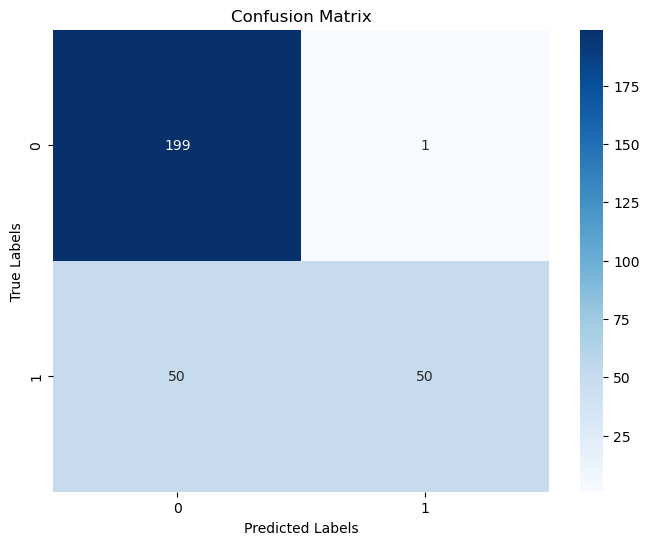

Val loss: 1.0647217988967896, Val acc: 0.83
Epoch 25/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


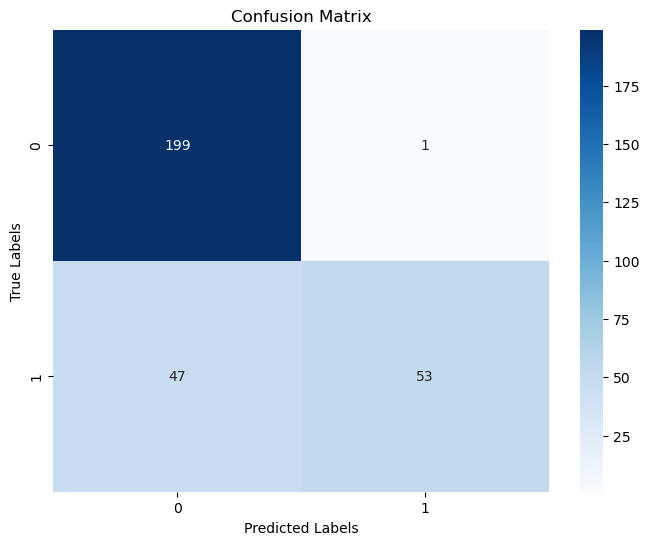

Val loss: 1.0524072349071503, Val acc: 0.84
Epoch 26/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


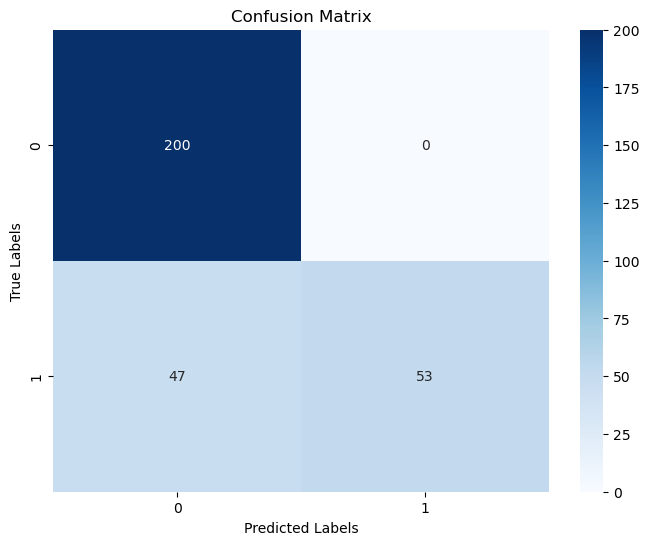

Val loss: 1.0516511976718903, Val acc: 0.8433333333333334
Epoch 27/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.09246866106987, Val acc: 0.8
Epoch 28/300
Val loss: 1.0798249781131743, Val acc: 0.8133333333333334
Epoch 29/300
Val loss: 1.086088627576828, Val acc: 0.8066666666666666
Epoch 30/300


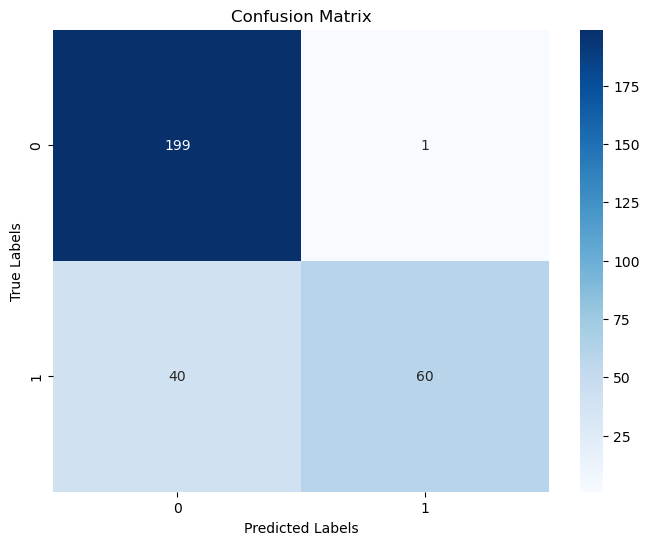

Val loss: 1.034400725364685, Val acc: 0.8633333333333333
Epoch 31/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.068549931049347, Val acc: 0.8233333333333334
Epoch 32/300
Val loss: 1.0679075181484223, Val acc: 0.8266666666666667
Epoch 33/300
Val loss: 1.077498584985733, Val acc: 0.8166666666666667
Epoch 34/300


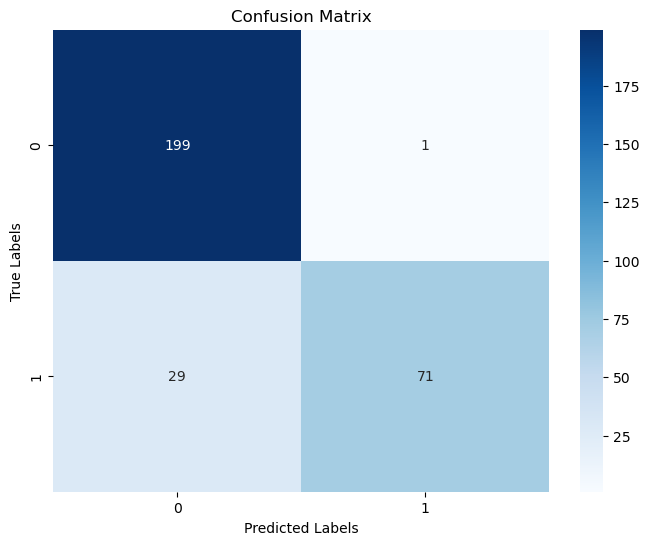

Val loss: 1.0007868230342865, Val acc: 0.9
Epoch 35/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.0255131363868712, Val acc: 0.87
Epoch 36/300
Val loss: 1.0558202147483826, Val acc: 0.84
Epoch 37/300
Val loss: 1.0300138771533967, Val acc: 0.8666666666666667
Epoch 38/300
Val loss: 1.0495347857475281, Val acc: 0.8433333333333334
Epoch 39/300
Val loss: 1.0568093180656433, Val acc: 0.8366666666666667
Epoch 40/300
Val loss: 1.0608720898628234, Val acc: 0.8333333333333334
Epoch 41/300
Val loss: 1.026070809364319, Val acc: 0.87
Epoch 42/300


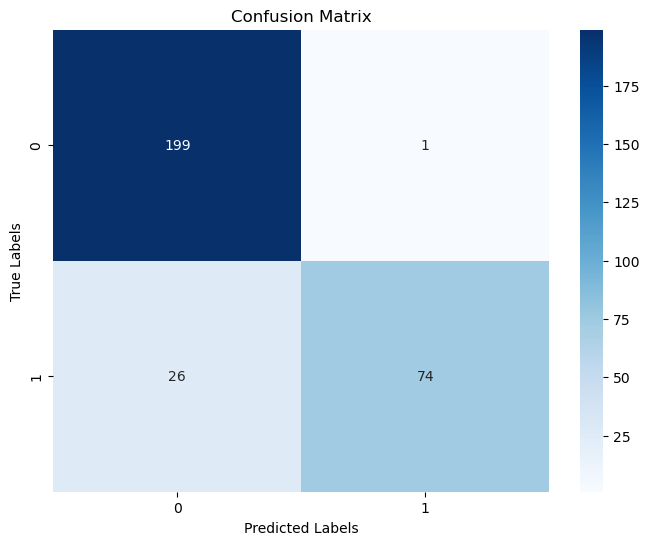

Val loss: 0.9888150095939636, Val acc: 0.91
Epoch 43/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.03815239071846, Val acc: 0.86
Epoch 44/300
Val loss: 1.0818576216697693, Val acc: 0.8133333333333334
Epoch 45/300
Val loss: 1.0505051374435426, Val acc: 0.8433333333333334
Epoch 46/300
Val loss: 1.0136930406093598, Val acc: 0.8833333333333333
Epoch 47/300
Val loss: 1.0071138262748718, Val acc: 0.8933333333333333
Epoch 48/300
Val loss: 1.0232816755771637, Val acc: 0.8733333333333333
Epoch 49/300
Val loss: 1.0675122439861298, Val acc: 0.8266666666666667
Epoch 50/300
Val loss: 1.0023824334144593, Val acc: 0.8966666666666666
Epoch 51/300
Val loss: 1.058444571495056, Val acc: 0.8366666666666667
Epoch 52/300
Val loss: 1.0304093956947327, Val acc: 0.8666666666666667
Epoch 53/300


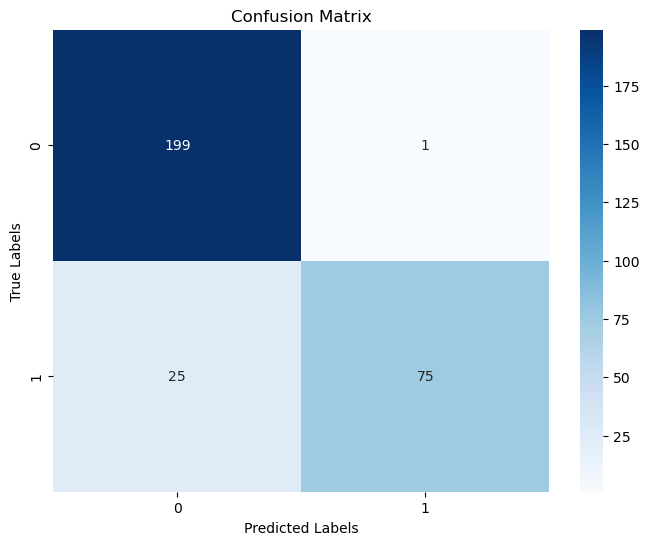

Val loss: 0.987480229139328, Val acc: 0.9133333333333333
Epoch 54/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.0745854794979095, Val acc: 0.82
Epoch 55/300
Val loss: 1.0387358248233796, Val acc: 0.86
Epoch 56/300
Val loss: 0.9976609408855438, Val acc: 0.9
Epoch 57/300
Val loss: 1.0069295644760132, Val acc: 0.89
Epoch 58/300
Val loss: 1.0029350757598876, Val acc: 0.8966666666666666
Epoch 59/300
Val loss: 1.0120512068271637, Val acc: 0.8866666666666667
Epoch 60/300
Val loss: 1.0232831597328187, Val acc: 0.87
Epoch 61/300
Val loss: 0.9862351477146148, Val acc: 0.9133333333333333
Epoch 62/300
Val loss: 0.9865335643291473, Val acc: 0.91
Epoch 63/300
Val loss: 1.0456216633319855, Val acc: 0.85
Epoch 64/300
Val loss: 1.0113197088241577, Val acc: 0.8866666666666667
Epoch 65/300
Val loss: 1.0485838770866394, Val acc: 0.8466666666666667
Epoch 66/300


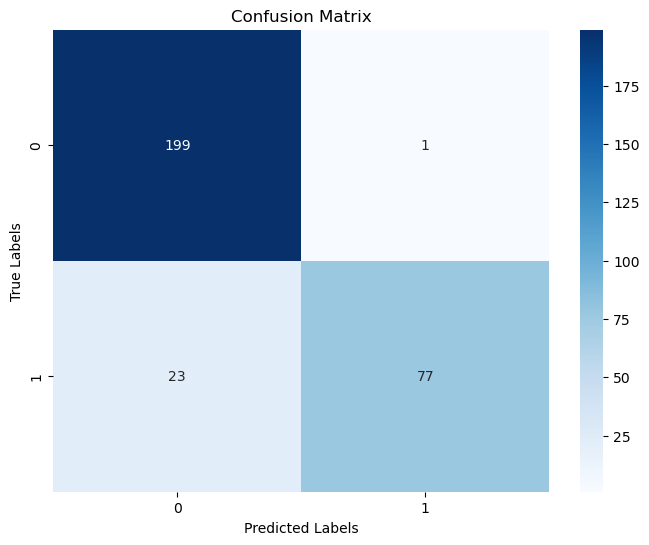

Val loss: 0.9819817662239074, Val acc: 0.92
Epoch 67/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 0.9831024825572967, Val acc: 0.9166666666666666
Epoch 68/300
Val loss: 1.05945845246315, Val acc: 0.8333333333333334
Epoch 69/300


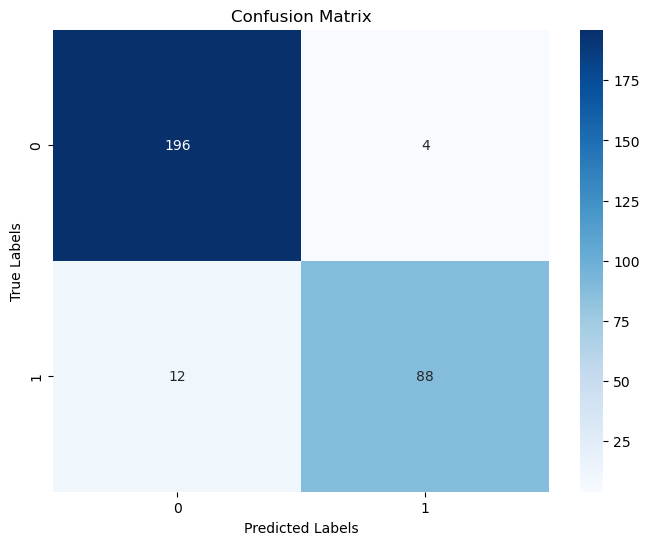

Val loss: 0.9548977077007293, Val acc: 0.9466666666666667
Epoch 70/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 0.993071186542511, Val acc: 0.9066666666666666
Epoch 71/300
Val loss: 0.9991186738014222, Val acc: 0.8966666666666666
Epoch 72/300
Val loss: 1.0520446479320527, Val acc: 0.84
Epoch 73/300
Val loss: 0.9982633888721466, Val acc: 0.8966666666666666
Epoch 74/300
Val loss: 0.9850285410881042, Val acc: 0.9133333333333333
Epoch 75/300
Val loss: 1.0183682024478913, Val acc: 0.8766666666666667
Epoch 76/300
Val loss: 0.9687304973602295, Val acc: 0.9333333333333333
Epoch 77/300
Val loss: 1.0144336581230164, Val acc: 0.8833333333333333
Epoch 78/300
Val loss: 1.0045161306858064, Val acc: 0.8933333333333333
Epoch 79/300
Val loss: 0.9808123230934143, Val acc: 0.9166666666666666
Epoch 80/300
Val loss: 0.9779383301734924, Val acc: 0.9233333333333333
Epoch 81/300
Val loss: 0.9746849715709687, Val acc: 0.9233333333333333
Epoch 82/300
Val loss: 1.0059105455875397, Val acc: 0.8933333333333333
Epoch 83/300
Val loss: 1.033696275949478, Val acc: 0.8633333333333333
Epoch 84/300
Val loss: 1.0085971295

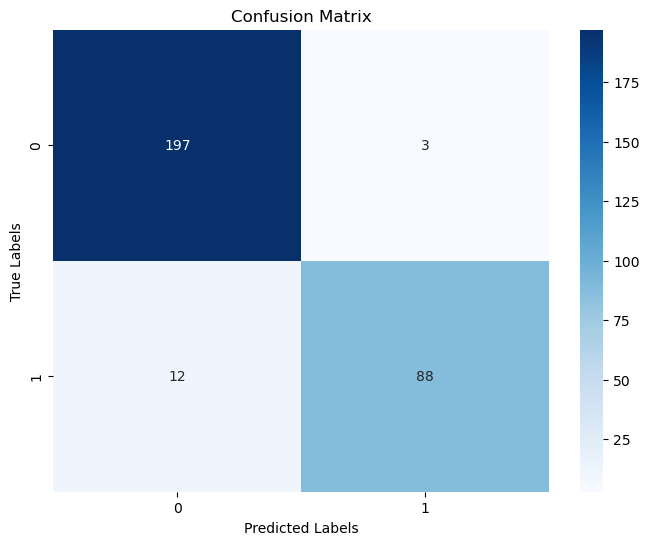

Val loss: 0.9516714155673981, Val acc: 0.95
Epoch 121/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 0.9758381724357605, Val acc: 0.9233333333333333
Epoch 122/300
Val loss: 0.9703791022300721, Val acc: 0.9266666666666666
Epoch 123/300
Val loss: 0.97123042345047, Val acc: 0.93
Epoch 124/300
Val loss: 0.9782495260238647, Val acc: 0.92
Epoch 125/300
Val loss: 1.0081745326519012, Val acc: 0.89
Epoch 126/300
Val loss: 1.0005605340003967, Val acc: 0.8966666666666666
Epoch 127/300
Val loss: 0.9776528537273407, Val acc: 0.9233333333333333
Epoch 128/300
Val loss: 0.9878682672977448, Val acc: 0.9133333333333333
Epoch 129/300
Val loss: 0.9955777585506439, Val acc: 0.9033333333333333
Epoch 130/300
Val loss: 0.9727639019489288, Val acc: 0.9266666666666666
Epoch 131/300
Val loss: 1.006219172477722, Val acc: 0.8933333333333333
Epoch 132/300
Val loss: 0.9971667110919953, Val acc: 0.9033333333333333
Epoch 133/300
Val loss: 1.003129678964615, Val acc: 0.8966666666666666
Epoch 134/300
Val loss: 0.9865953028202057, Val acc: 0.91
Epoch 135/300
Val loss: 1.0018573462963105, Val acc: 0.89666666666

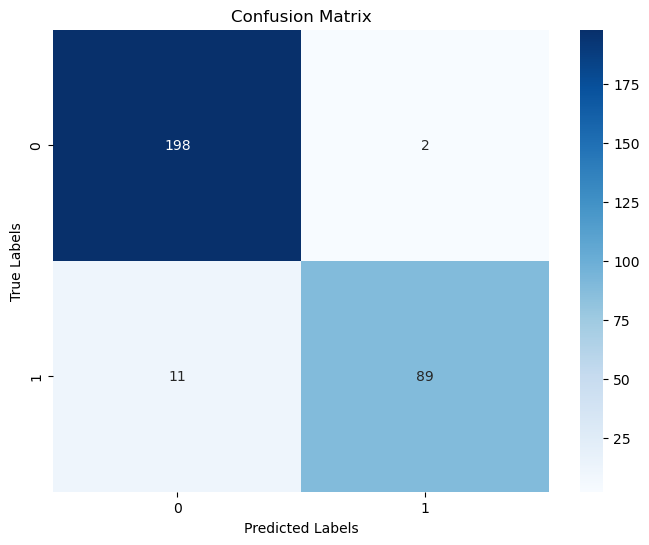

Val loss: 0.9471763432025909, Val acc: 0.9566666666666667
Epoch 167/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 0.9729676723480225, Val acc: 0.9266666666666666
Epoch 168/300
Val loss: 0.980548906326294, Val acc: 0.92
Epoch 169/300
Val loss: 0.9718080699443817, Val acc: 0.93
Epoch 170/300
Val loss: 0.9671159148216247, Val acc: 0.9333333333333333
Epoch 171/300
Val loss: 0.9925039768218994, Val acc: 0.9066666666666666
Epoch 172/300
Val loss: 0.9540864169597626, Val acc: 0.9466666666666667
Epoch 173/300
Val loss: 0.9780202805995941, Val acc: 0.9233333333333333
Epoch 174/300
Val loss: 0.9824982285499573, Val acc: 0.9166666666666666
Epoch 175/300
Val loss: 0.9829861938953399, Val acc: 0.9133333333333333
Epoch 176/300
Val loss: 0.9610483884811402, Val acc: 0.94
Epoch 177/300
Val loss: 0.9636750817298889, Val acc: 0.9366666666666666
Epoch 178/300
Val loss: 0.9757534146308899, Val acc: 0.9233333333333333
Epoch 179/300
Val loss: 0.9855114996433259, Val acc: 0.9133333333333333
Epoch 180/300
Val loss: 0.977034842967987, Val acc: 0.9233333333333333
Epoch 181/300
Val loss: 0.9713841795921325, Val ac

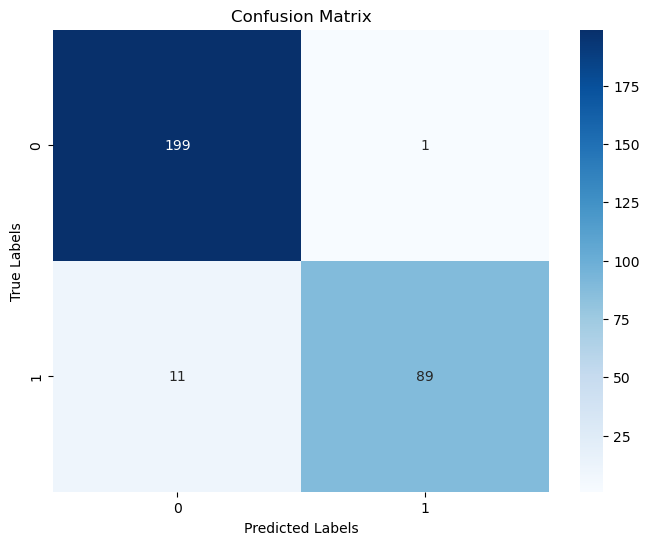

Val loss: 0.941932737827301, Val acc: 0.96
Epoch 220/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 0.9620192885398865, Val acc: 0.94
Epoch 221/300


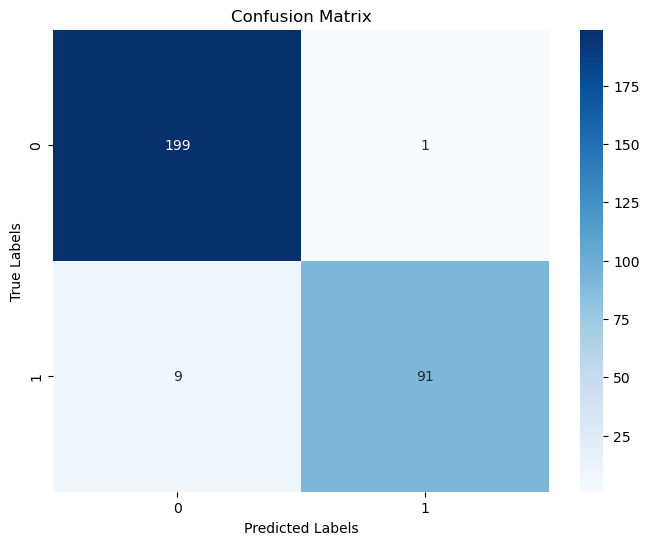

Val loss: 0.9363629817962646, Val acc: 0.9666666666666667
Epoch 222/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 0.9587641537189484, Val acc: 0.9433333333333334
Epoch 223/300
Val loss: 0.949477082490921, Val acc: 0.9533333333333334
Epoch 224/300
Val loss: 0.9550452411174775, Val acc: 0.9466666666666667
Epoch 225/300
Val loss: 0.9520168960094452, Val acc: 0.95
Epoch 226/300
Val loss: 0.9543187260627747, Val acc: 0.9466666666666667
Epoch 227/300
Val loss: 0.9488266229629516, Val acc: 0.95
Epoch 228/300
Val loss: 0.962517386674881, Val acc: 0.9366666666666666
Epoch 229/300
Val loss: 0.9639454901218414, Val acc: 0.9366666666666666
Epoch 230/300
Val loss: 0.9765125632286071, Val acc: 0.9233333333333333
Epoch 231/300
Val loss: 1.0267341554164886, Val acc: 0.87
Epoch 232/300
Val loss: 0.9670502781867981, Val acc: 0.9333333333333333
Epoch 233/300
Val loss: 0.9659308671951294, Val acc: 0.9333333333333333
Epoch 234/300
Val loss: 0.9795596480369568, Val acc: 0.92
Epoch 235/300
Val loss: 0.9812245547771454, Val acc: 0.9166666666666666
Epoch 236/300
Val loss: 0.9592987179756165, Val acc: 0.94
Epoch 

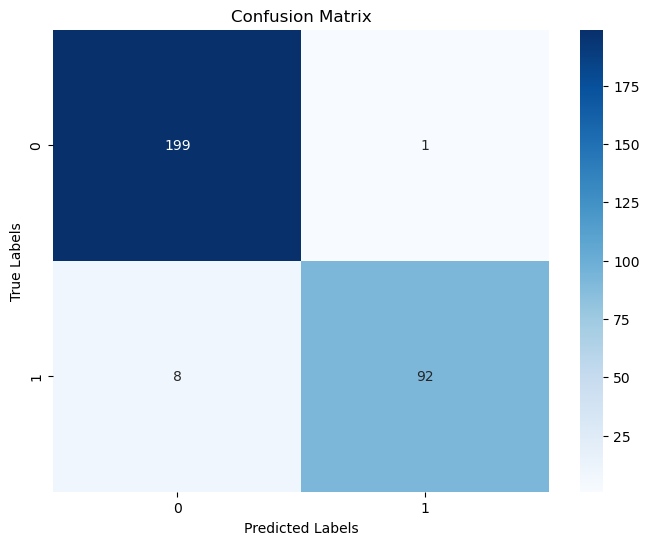

Val loss: 0.9335304439067841, Val acc: 0.97
Epoch 259/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 0.9581319928169251, Val acc: 0.94
Epoch 260/300
Val loss: 0.9611475944519043, Val acc: 0.9366666666666666
Epoch 261/300
Val loss: 0.9688114941120147, Val acc: 0.93
Epoch 262/300
Val loss: 0.9668916702270508, Val acc: 0.9333333333333333
Epoch 263/300
Val loss: 0.9606763422489166, Val acc: 0.94
Epoch 264/300
Val loss: 0.9738109290599823, Val acc: 0.9266666666666666
Epoch 265/300
Val loss: 0.9808923661708832, Val acc: 0.92
Epoch 266/300
Val loss: 0.9607212960720062, Val acc: 0.94
Epoch 267/300
Val loss: 0.9457051575183868, Val acc: 0.9566666666666667
Epoch 268/300
Val loss: 0.9449093639850616, Val acc: 0.9566666666666667
Epoch 269/300
Val loss: 0.9580473184585572, Val acc: 0.9433333333333334
Epoch 270/300
Val loss: 0.9751000702381134, Val acc: 0.9266666666666666
Epoch 271/300
Val loss: 0.9435330092906952, Val acc: 0.9566666666666667
Epoch 272/300
Val loss: 0.9573210060596467, Val acc: 0.9433333333333334
Epoch 273/300
Val loss: 0.9522782266139984, Val acc: 0.95
Epoch 274/300
Val 

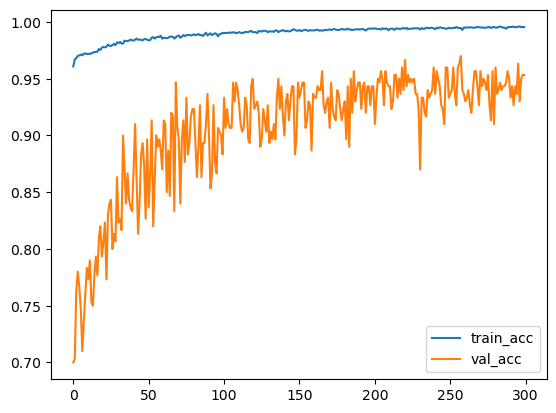

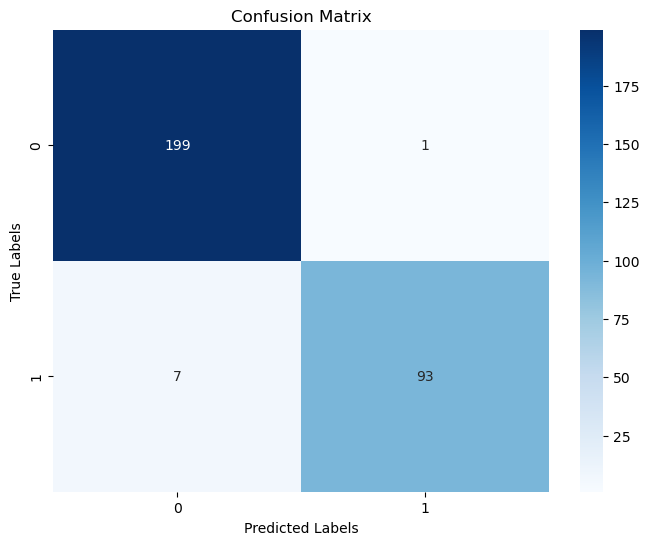

Test loss: 0.93277547955513, Test acc: 0.9733333333333334


In [5]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",synthetic_SN=synthetic_SN,syn_in_train=5000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([29065, 11396])
tensor([200, 100])
tensor([200, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


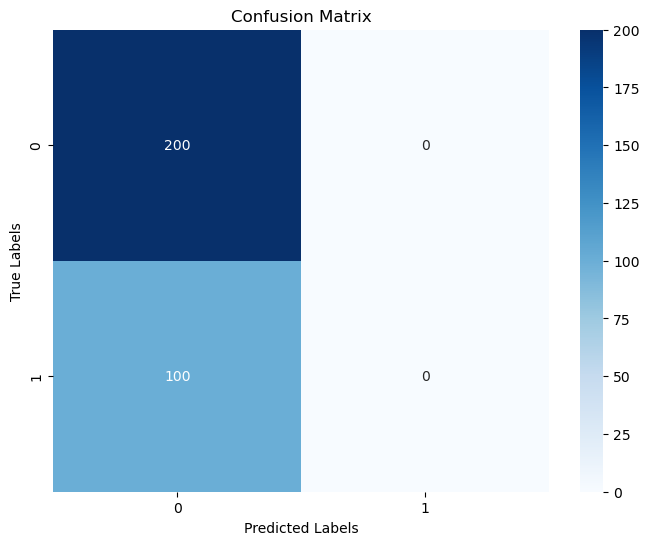

Val loss: 1.2182521581649781, Val acc: 0.6666666666666666
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2176853597164154, Val acc: 0.6666666666666666
Epoch 3/300
Val loss: 1.217352718114853, Val acc: 0.6666666666666666
Epoch 4/300
Val loss: 1.2173386096954346, Val acc: 0.6666666666666666
Epoch 5/300
Val loss: 1.2173347234725953, Val acc: 0.6666666666666666
Epoch 6/300
Val loss: 1.217333859205246, Val acc: 0.6666666666666666
Epoch 7/300
Val loss: 1.2173341512680054, Val acc: 0.6666666666666666
Epoch 8/300
Val loss: 1.2173325061798095, Val acc: 0.6666666666666666
Epoch 9/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 10/300
Val loss: 1.2173324823379517, Val acc: 0.6666666666666666
Epoch 11/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 12/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 13/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 14/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 15/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 16/300
Val loss: 1.217

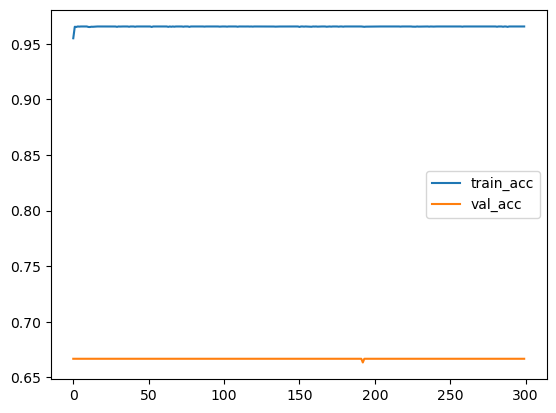

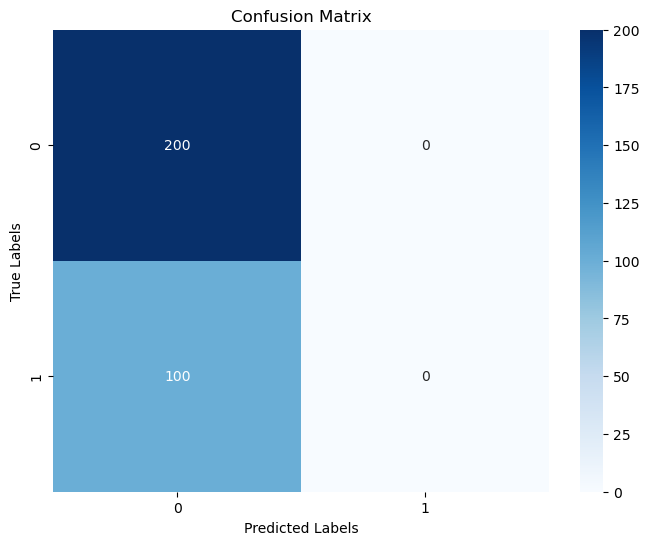

Test loss: 1.2173325955867766, Test acc: 0.6666666666666666


In [6]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",synthetic_SN=synthetic_SN,syn_in_train=10000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([29065, 16396])
tensor([200, 100])
tensor([200, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


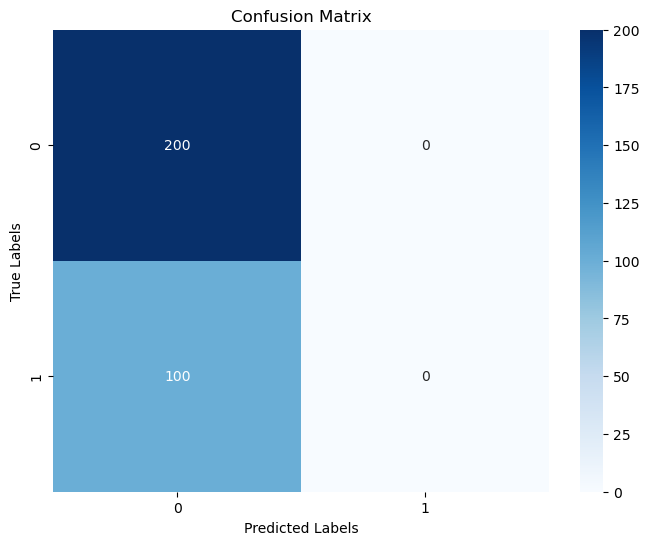

Val loss: 1.2174987316131591, Val acc: 0.6666666666666666
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2173512935638429, Val acc: 0.6666666666666666
Epoch 3/300
Val loss: 1.21734476685524, Val acc: 0.6666666666666666
Epoch 4/300
Val loss: 1.217336392402649, Val acc: 0.6666666666666666
Epoch 5/300
Val loss: 1.2173328459262849, Val acc: 0.6666666666666666
Epoch 6/300
Val loss: 1.2173334121704102, Val acc: 0.6666666666666666
Epoch 7/300
Val loss: 1.2173325657844543, Val acc: 0.6666666666666666
Epoch 8/300
Val loss: 1.2173325061798095, Val acc: 0.6666666666666666
Epoch 9/300
Val loss: 1.2173324704170227, Val acc: 0.6666666666666666
Epoch 10/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 11/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 12/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 13/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 14/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 15/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 16/300
Val loss: 1.2173

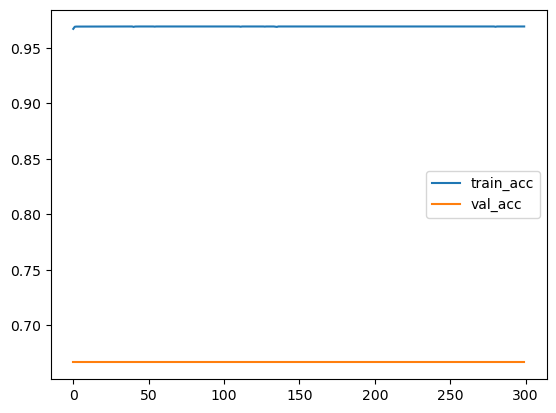

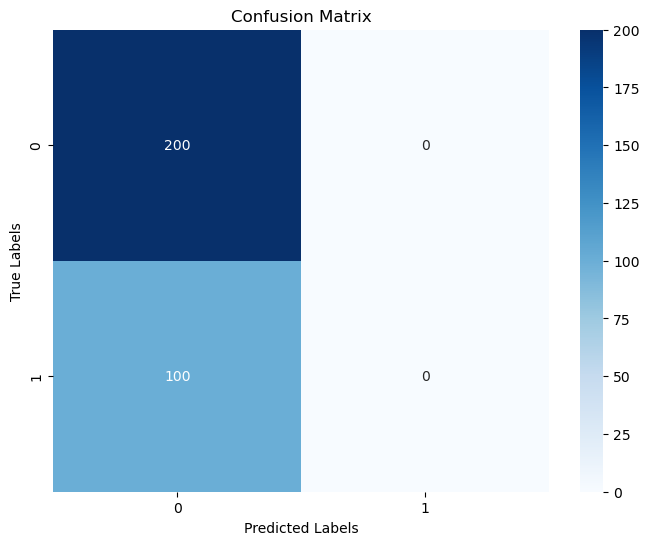

Test loss: 1.2173325955867766, Test acc: 0.6666666666666666


In [7]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",synthetic_SN=synthetic_SN,syn_in_train=15000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([29065, 21396])
tensor([200, 100])
tensor([200, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


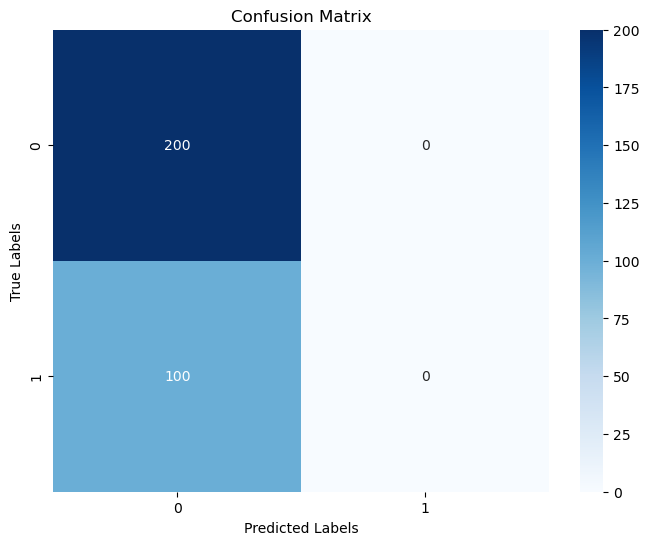

Val loss: 1.217547106742859, Val acc: 0.6666666666666666
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2173644483089447, Val acc: 0.6666666666666666
Epoch 3/300
Val loss: 1.2173452079296112, Val acc: 0.6666666666666666
Epoch 4/300
Val loss: 1.217333722114563, Val acc: 0.6666666666666666
Epoch 5/300
Val loss: 1.2173329293727875, Val acc: 0.6666666666666666
Epoch 6/300
Val loss: 1.217333322763443, Val acc: 0.6666666666666666
Epoch 7/300
Val loss: 1.2173325061798095, Val acc: 0.6666666666666666
Epoch 8/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 9/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 10/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 11/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 12/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 13/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 14/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 15/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 16/300
Val loss: 1.217

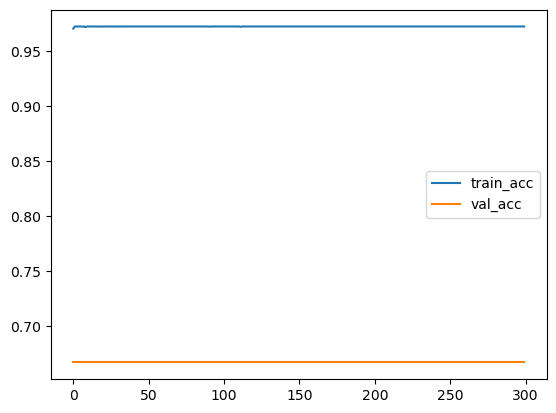

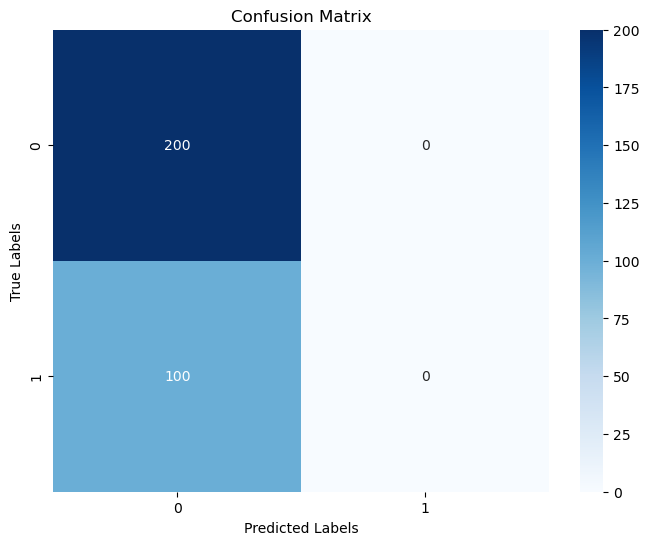

Test loss: 1.2173325955867766, Test acc: 0.6666666666666666


In [8]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",synthetic_SN=synthetic_SN,syn_in_train=20000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([29065, 26396])
tensor([200, 100])
tensor([200, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


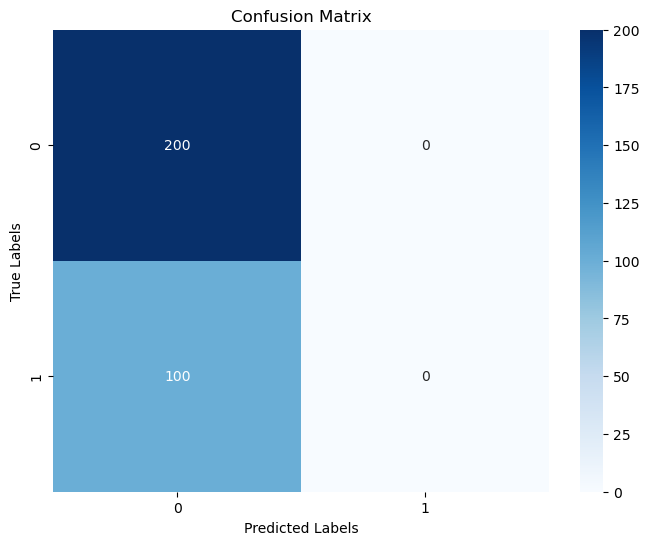

Val loss: 1.2174559593200684, Val acc: 0.6666666666666666
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2173624396324159, Val acc: 0.6666666666666666
Epoch 3/300
Val loss: 1.217340624332428, Val acc: 0.6666666666666666
Epoch 4/300
Val loss: 1.2173330307006835, Val acc: 0.6666666666666666
Epoch 5/300
Val loss: 1.2173327803611755, Val acc: 0.6666666666666666
Epoch 6/300
Val loss: 1.217333060503006, Val acc: 0.6666666666666666
Epoch 7/300
Val loss: 1.2173325896263123, Val acc: 0.6666666666666666
Epoch 8/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 9/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 10/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 11/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 12/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 13/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 14/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 15/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 16/300
Val loss: 1.217

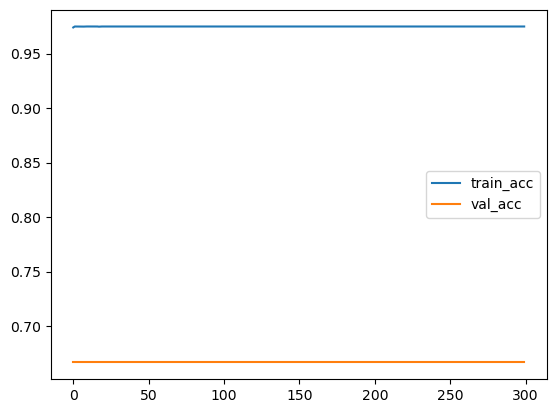

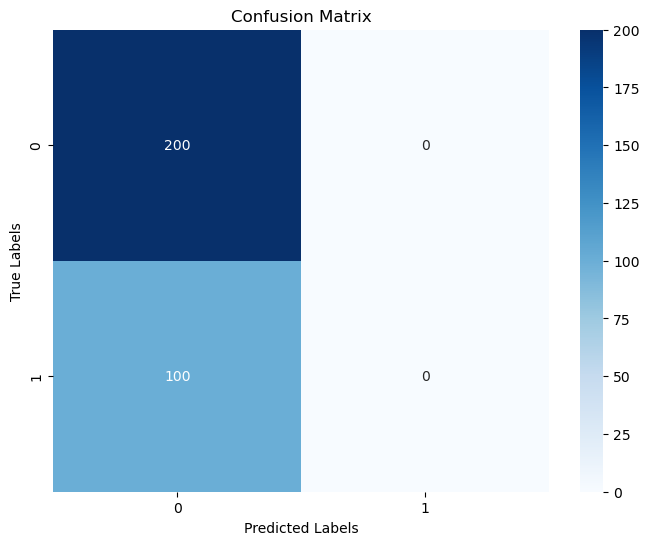

Test loss: 1.2173325955867766, Test acc: 0.6666666666666666


In [9]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",synthetic_SN=synthetic_SN,syn_in_train=25000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([29065, 31396])
tensor([200, 100])
tensor([200, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


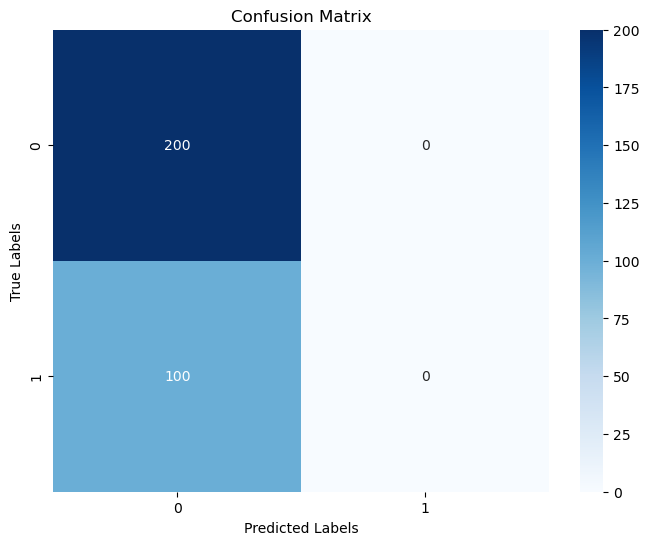

Val loss: 1.2175817012786865, Val acc: 0.6666666666666666
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.2173766136169433, Val acc: 0.6666666666666666
Epoch 3/300
Val loss: 1.2173376023769378, Val acc: 0.6666666666666666
Epoch 4/300
Val loss: 1.2173345506191253, Val acc: 0.6666666666666666
Epoch 5/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 6/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 7/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 8/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 9/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 10/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 11/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 12/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 13/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 14/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 15/300
Val loss: 1.2173324584960938, Val acc: 0.6666666666666666
Epoch 16/300
Val loss: 1.2

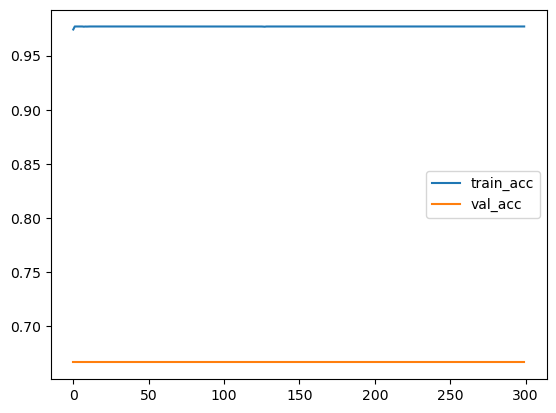

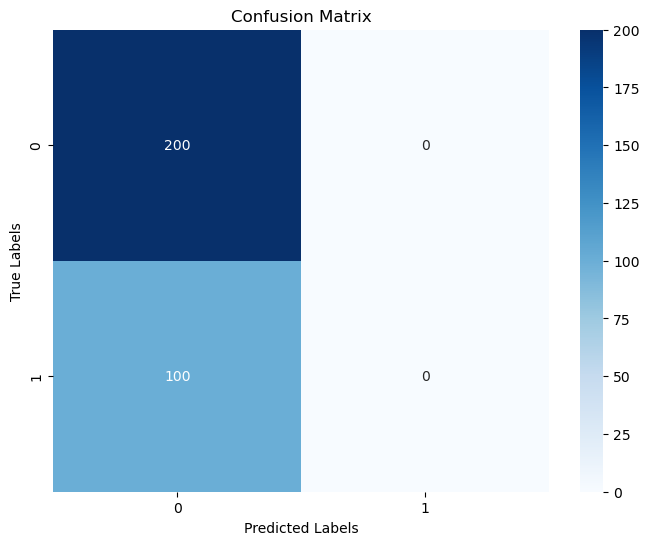

Test loss: 1.2173325955867766, Test acc: 0.6666666666666666


In [10]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",synthetic_SN=synthetic_SN,syn_in_train=30000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([29065, 29065])
tensor([200, 200])
tensor([200, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


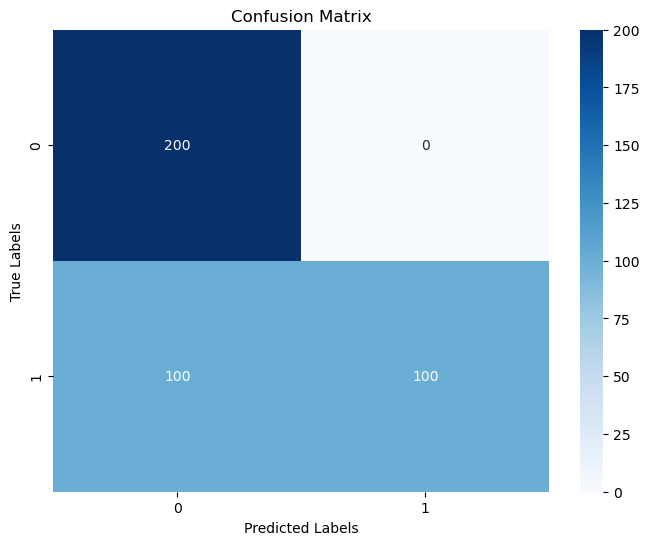

Val loss: 1.1453604744030879, Val acc: 0.75
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1452436859791095, Val acc: 0.75
Epoch 3/300
Val loss: 1.1452263731222887, Val acc: 0.75
Epoch 4/300
Val loss: 1.1452195781927843, Val acc: 0.75
Epoch 5/300
Val loss: 1.1452183494201074, Val acc: 0.75
Epoch 6/300
Val loss: 1.1452172765365014, Val acc: 0.75
Epoch 7/300
Val loss: 1.1452171848370478, Val acc: 0.75
Epoch 8/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 9/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 10/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 11/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 12/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 13/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 14/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 15/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 16/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 17/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 18/300
Val loss: 1.1452171389873211, Val acc: 0.75
Epoch 19/300
Val loss: 1.1452171389873211, Val acc:

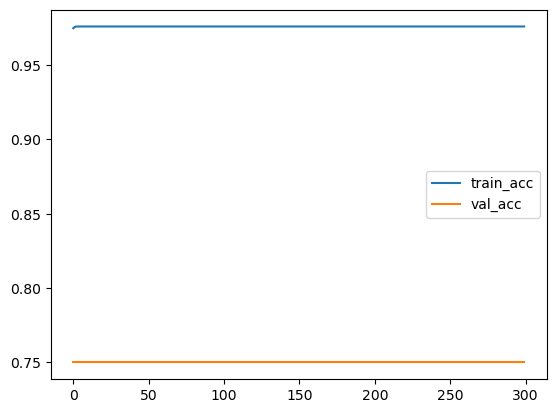

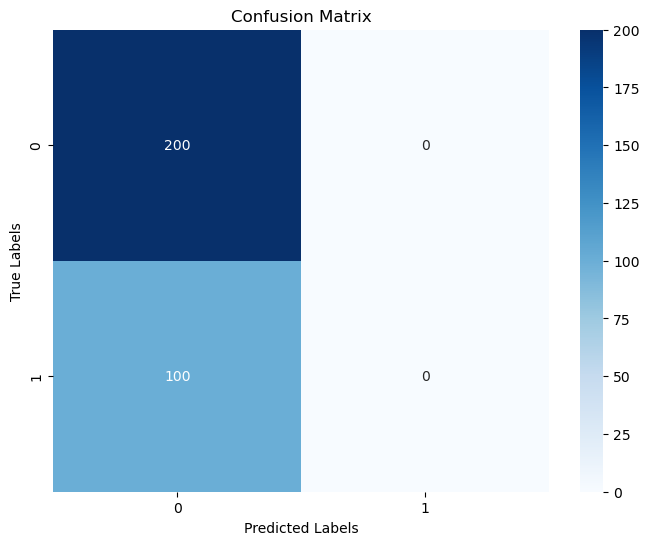

Test loss: 1.2173325955867766, Test acc: 0.6666666666666666


In [11]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",synthetic_SN=synthetic_SN,syn_in_train=27669,syn_in_val=100,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

# Entrenamiento con bogus y asteroid

dict_keys(['Train', 'Validation', 'Test'])
tensor([49198,  1396])
tensor([400, 100])
tensor([400, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


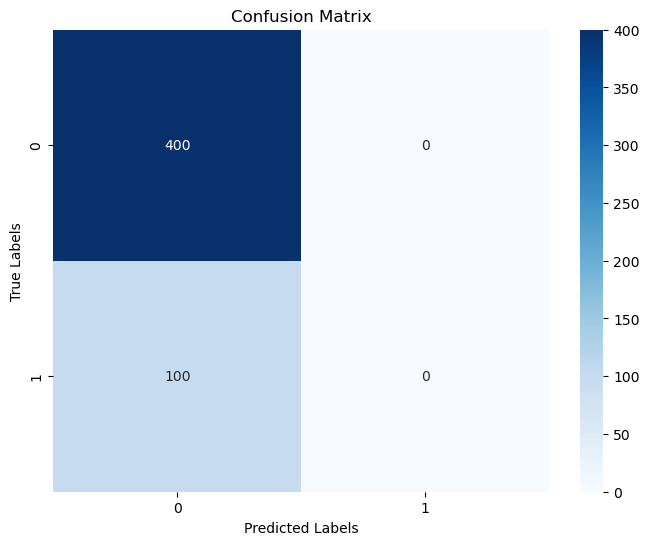

Val loss: 1.101261232048273, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1004116535186768, Val acc: 0.8
Epoch 3/300
Val loss: 1.1002317517995834, Val acc: 0.8
Epoch 4/300
Val loss: 1.1001770608127117, Val acc: 0.8
Epoch 5/300
Val loss: 1.1001564487814903, Val acc: 0.8
Epoch 6/300
Val loss: 1.1001496501266956, Val acc: 0.8
Epoch 7/300
Val loss: 1.1001472473144531, Val acc: 0.8
Epoch 8/300
Val loss: 1.1001459956169128, Val acc: 0.8
Epoch 9/300
Val loss: 1.1001453287899494, Val acc: 0.8
Epoch 10/300
Val loss: 1.1001451015472412, Val acc: 0.8
Epoch 11/300
Val loss: 1.1001450791954994, Val acc: 0.8
Epoch 12/300
Val loss: 1.10014508664608, Val acc: 0.8
Epoch 13/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 14/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 15/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 16/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 17/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 18/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 19/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 20/300
Val loss

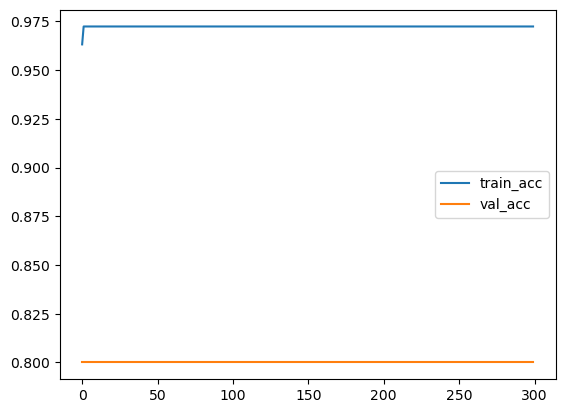

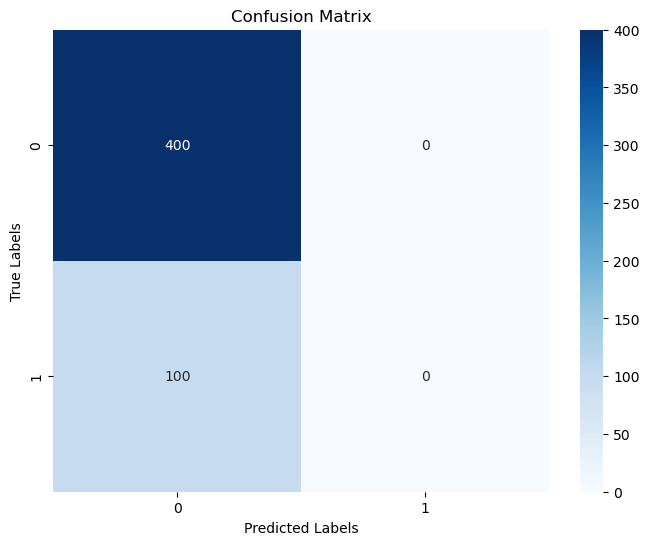

Test loss: 1.100145097821951, Test acc: 0.8


In [12]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28_1.pkl",synthetic_SN=synthetic_SN,syn_in_train=0,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([49198,  6396])
tensor([400, 100])
tensor([400, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


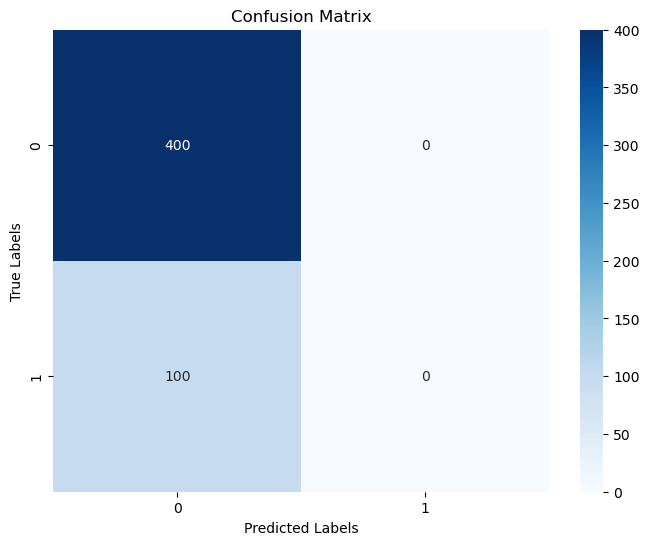

Val loss: 1.1005261428654194, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.100243404507637, Val acc: 0.8
Epoch 3/300
Val loss: 1.1001723520457745, Val acc: 0.8
Epoch 4/300
Val loss: 1.1001482047140598, Val acc: 0.8
Epoch 5/300
Val loss: 1.1001488864421844, Val acc: 0.8
Epoch 6/300
Val loss: 1.1001459024846554, Val acc: 0.8
Epoch 7/300
Val loss: 1.100145261734724, Val acc: 0.8
Epoch 8/300
Val loss: 1.1001459993422031, Val acc: 0.8
Epoch 9/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 10/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 11/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 12/300
Val loss: 1.1001450642943382, Val acc: 0.8
Epoch 13/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 14/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 15/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 16/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 17/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 18/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 19/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 20/300
Val loss: 1

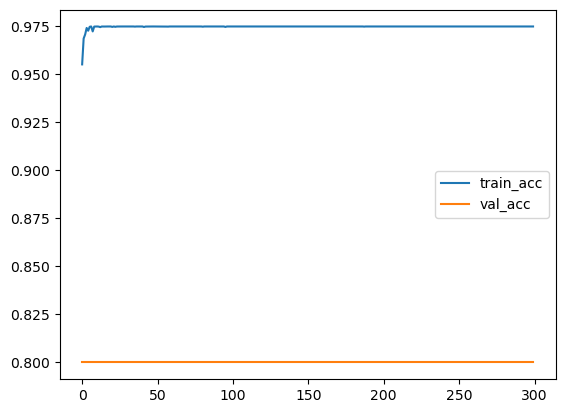

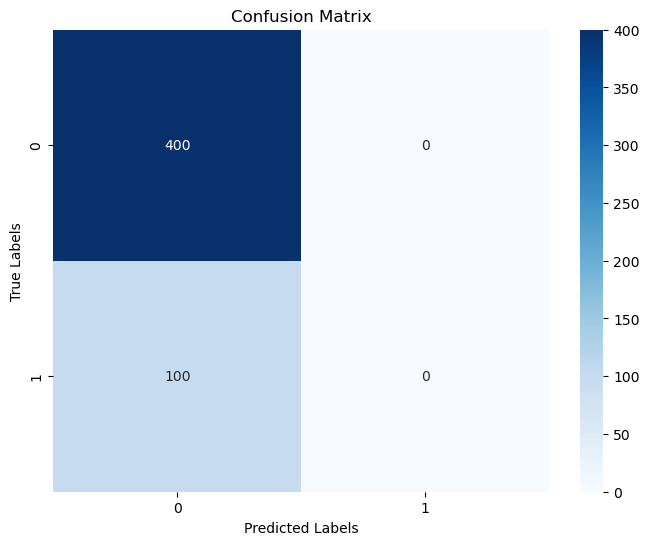

Test loss: 1.100145097821951, Test acc: 0.8


In [13]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28_1.pkl",synthetic_SN=synthetic_SN,syn_in_train=5000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([49198, 11396])
tensor([400, 100])
tensor([400, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


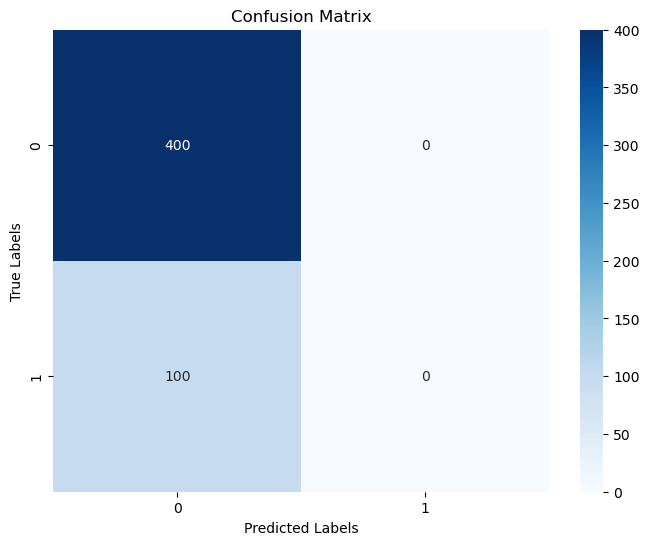

Val loss: 1.100623358041048, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1002301722764969, Val acc: 0.8
Epoch 3/300
Val loss: 1.100171398371458, Val acc: 0.8
Epoch 4/300
Val loss: 1.100149754434824, Val acc: 0.8
Epoch 5/300
Val loss: 1.1001462452113628, Val acc: 0.8
Epoch 6/300
Val loss: 1.100145097821951, Val acc: 0.8
Epoch 7/300
Val loss: 1.1001450642943382, Val acc: 0.8
Epoch 8/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 9/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 10/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 11/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 12/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 13/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 14/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 15/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 16/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 17/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 18/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 19/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 20/300
Val loss: 1.10

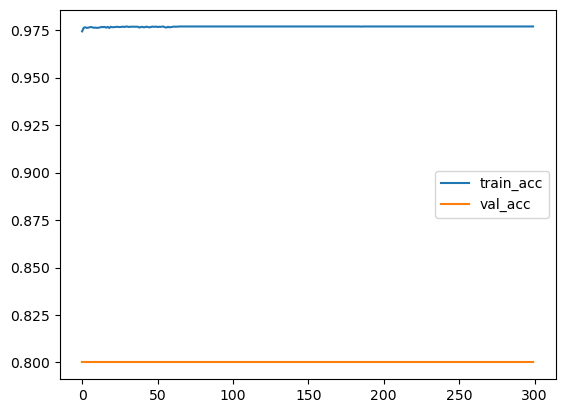

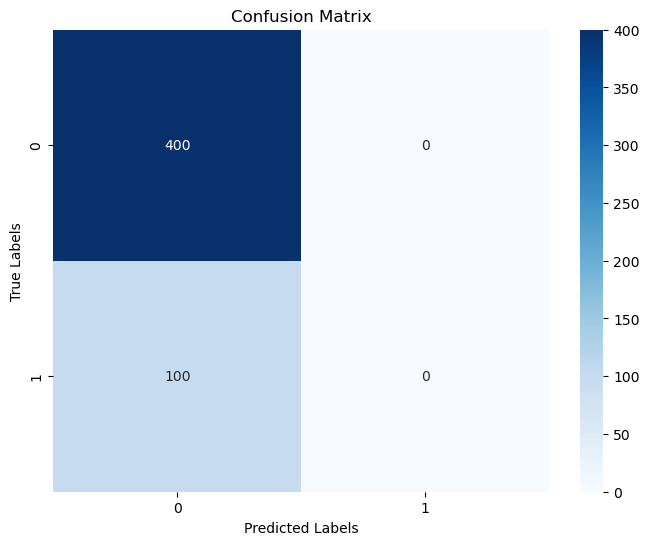

Test loss: 1.100145097821951, Test acc: 0.8


In [14]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28_1.pkl",synthetic_SN=synthetic_SN,syn_in_train=10000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([49198, 21396])
tensor([400, 100])
tensor([400, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


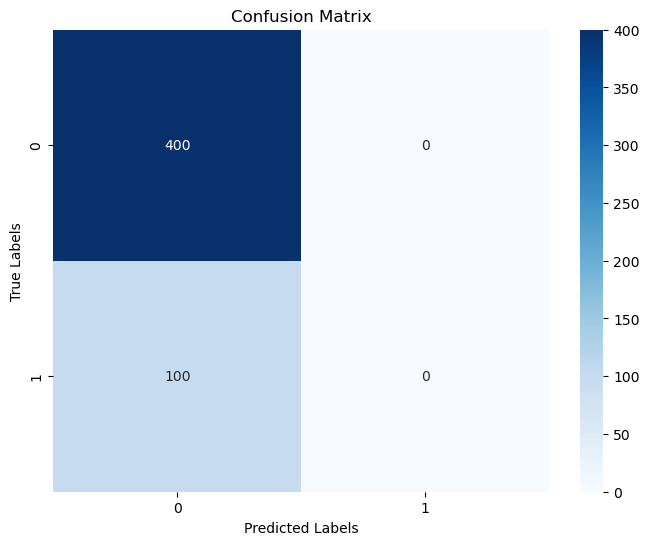

Val loss: 1.1004388108849525, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1001713015139103, Val acc: 0.8
Epoch 3/300
Val loss: 1.1001537144184113, Val acc: 0.8
Epoch 4/300
Val loss: 1.1001468487083912, Val acc: 0.8
Epoch 5/300
Val loss: 1.1001452095806599, Val acc: 0.8
Epoch 6/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 7/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 8/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 9/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 10/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 11/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 12/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 13/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 14/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 15/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 16/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 17/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 18/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 19/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 20/300
Val loss: 1.1

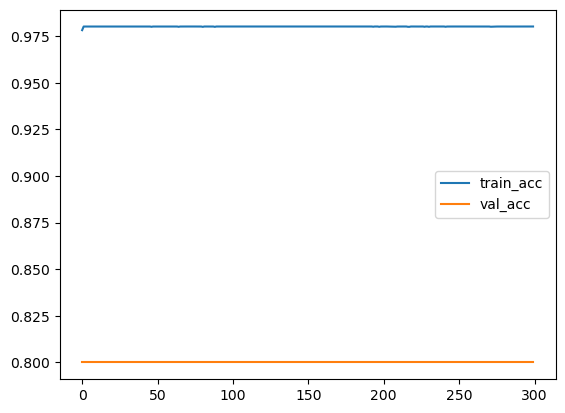

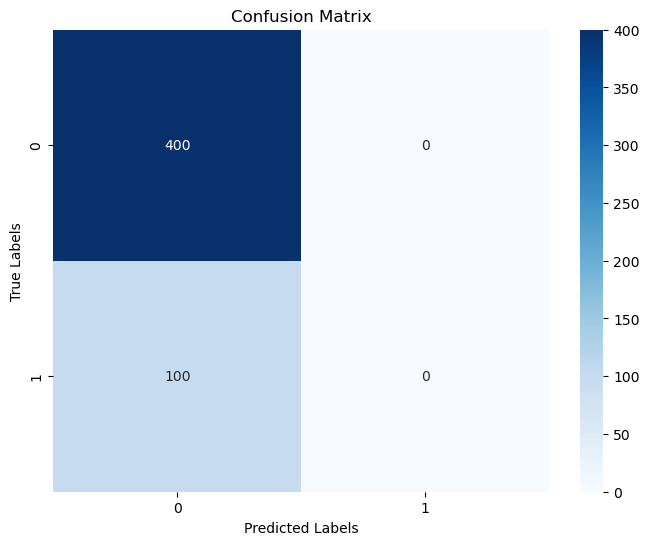

Test loss: 1.100145097821951, Test acc: 0.8


In [15]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28_1.pkl",synthetic_SN=synthetic_SN,syn_in_train=20000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([49198, 31396])
tensor([400, 100])
tensor([400, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


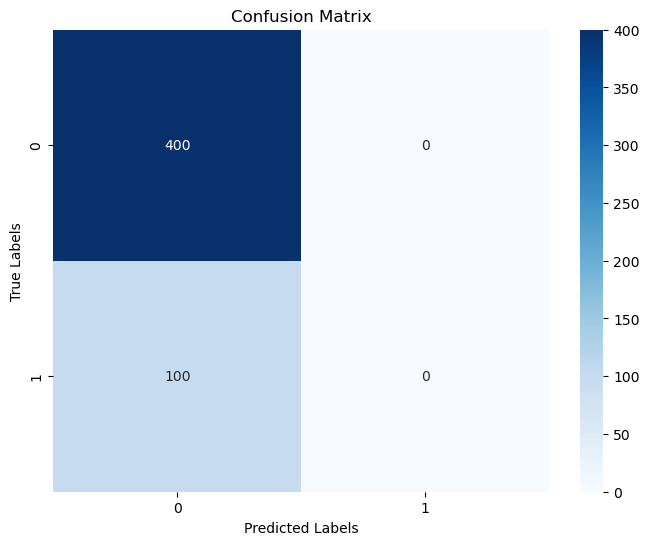

Val loss: 1.1003220826387405, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1001569442451, Val acc: 0.8
Epoch 3/300
Val loss: 1.1001489274203777, Val acc: 0.8
Epoch 4/300
Val loss: 1.1001454181969166, Val acc: 0.8
Epoch 5/300
Val loss: 1.1001451052725315, Val acc: 0.8
Epoch 6/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 7/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 8/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 9/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 10/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 11/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 12/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 13/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 14/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 15/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 16/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 17/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 18/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 19/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 20/300
Val loss: 1.1001

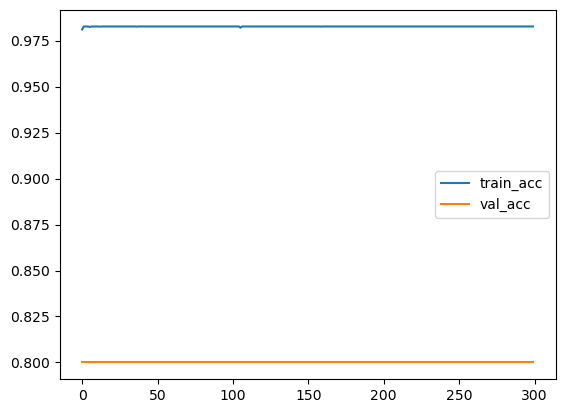

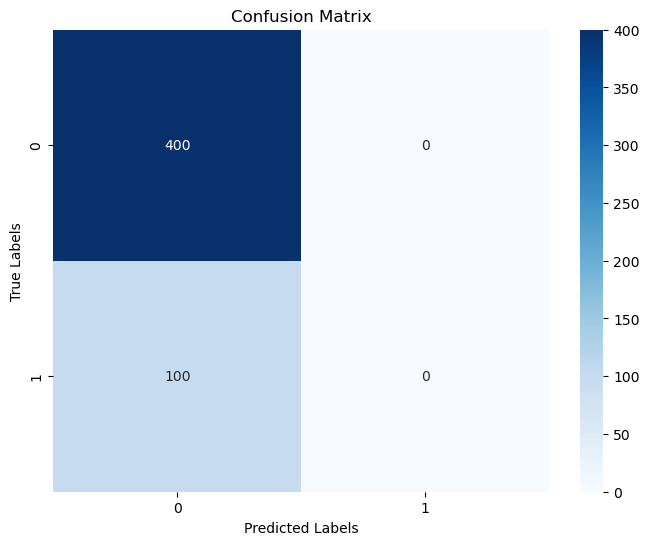

Test loss: 1.100145097821951, Test acc: 0.8


In [16]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28_1.pkl",synthetic_SN=synthetic_SN,syn_in_train=30000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([49198, 41396])
tensor([400, 100])
tensor([400, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


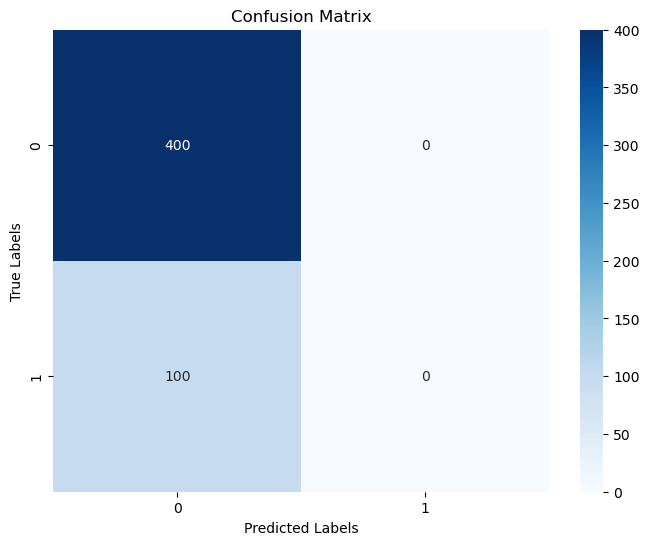

Val loss: 1.100213911384344, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.100158091634512, Val acc: 0.8
Epoch 3/300
Val loss: 1.1001454629004002, Val acc: 0.8
Epoch 4/300
Val loss: 1.100145224481821, Val acc: 0.8
Epoch 5/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 6/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 7/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 8/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 9/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 10/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 11/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 12/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 13/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 14/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 15/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 16/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 17/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 18/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 19/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 20/300
Val loss: 1.1001

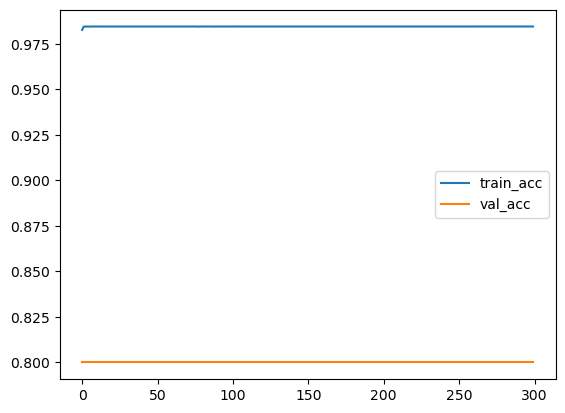

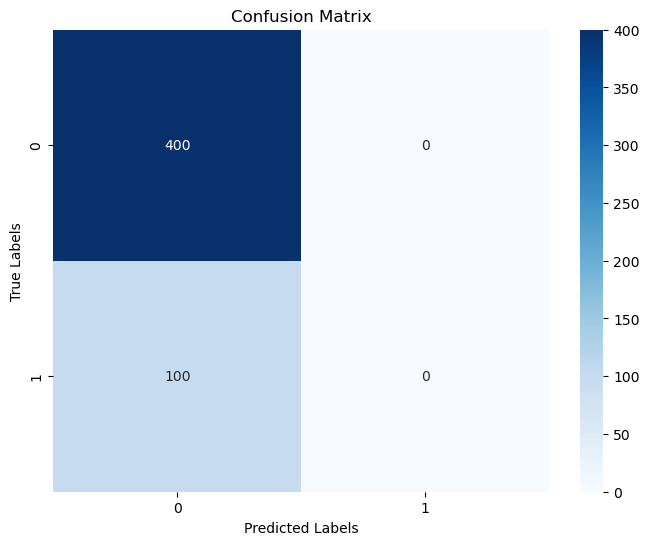

Test loss: 1.100145097821951, Test acc: 0.8


In [17]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28_1.pkl",synthetic_SN=synthetic_SN,syn_in_train=40000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)

dict_keys(['Train', 'Validation', 'Test'])
tensor([49198, 51396])
tensor([400, 100])
tensor([400, 100])
Epoch 1/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


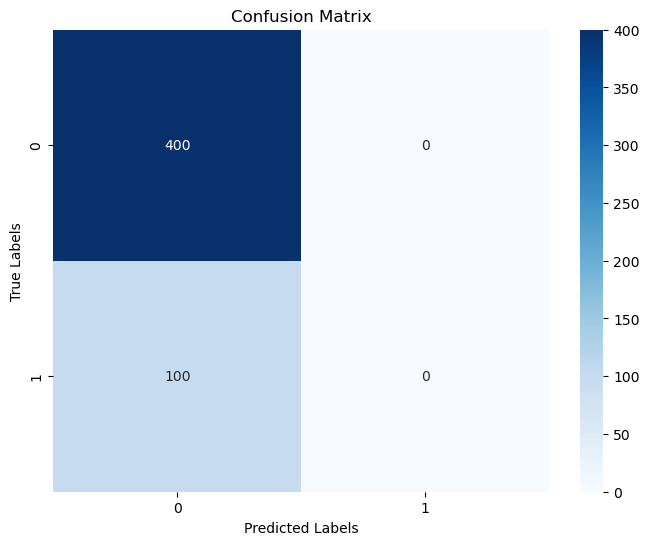

Val loss: 1.1002188846468925, Val acc: 0.8
Epoch 2/300


/home/nfierroflo/anaconda3/envs/gans/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.1001472249627113, Val acc: 0.8
Epoch 3/300
Val loss: 1.1001452915370464, Val acc: 0.8
Epoch 4/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 5/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 6/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 7/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 8/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 9/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 10/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 11/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 12/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 13/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 14/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 15/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 16/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 17/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 18/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 19/300
Val loss: 1.100145060569048, Val acc: 0.8
Epoch 20/300
Val loss: 1.100

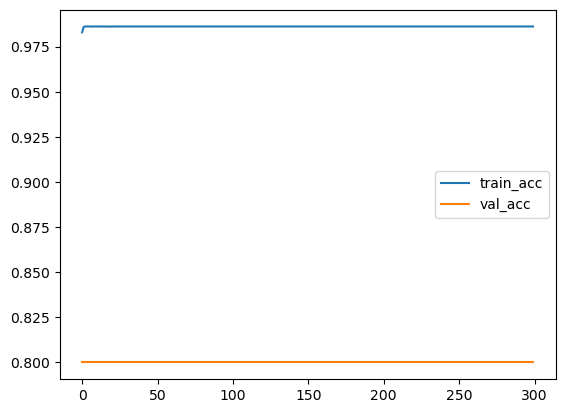

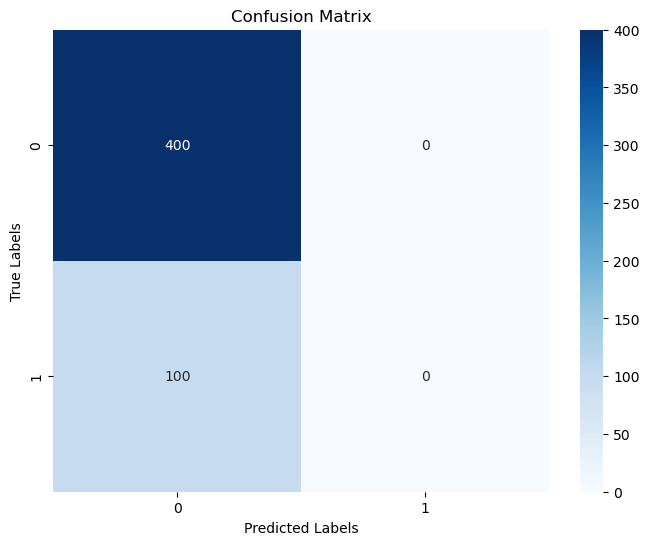

Test loss: 1.100145097821951, Test acc: 0.8


In [18]:
train_loader, val_loader, test_loader=get_mixed_binarydatasets_loaders(save_dir='data/',batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28_1.pkl",synthetic_SN=synthetic_SN,syn_in_train=50000,syn_in_val=0,syn_in_test=0)    
print(torch.bincount(train_loader.dataset.labels.to(torch.int)))
print(torch.bincount(val_loader.dataset.labels.to(torch.int)))
print(torch.bincount(test_loader.dataset.labels.to(torch.int)))

curves,model=trainer(train_loader,val_loader,epochs=300)

test_acc, test_loss=tester(test_loader,model)